#The Learned Vector Quantization classifier
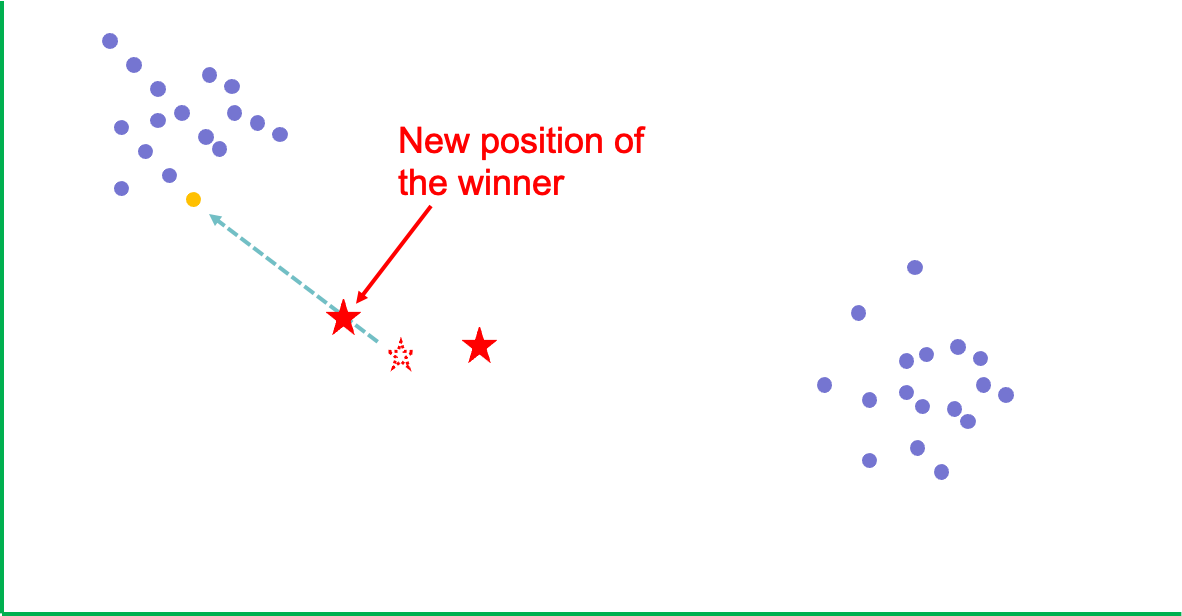

##Voronoy diagram

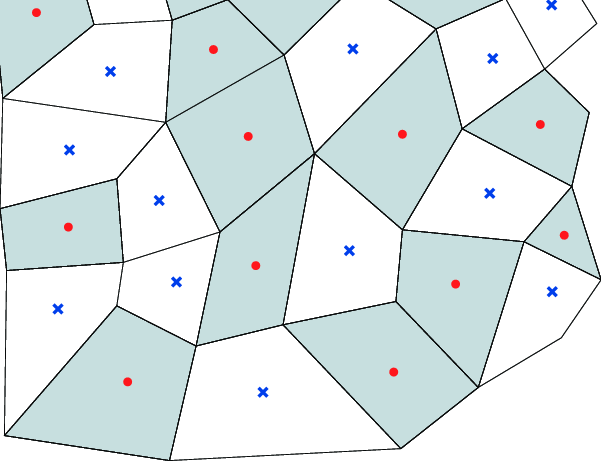

#Preliminary operations

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('drive/MyDrive/ML/Exercise05_LVQ')
!ls

example.xlsx  LVQ_FCSL.ipynb  LVQ.ipynb  test.xlsx  train.xlsx


#Dataset

In [ ]:
data = pd.read_excel('train.xlsx')

In [ ]:
data

,Height,Weight,Gender
0,167.322552,66.721073,Female
1,176.237039,90.126539,Male
2,157.066226,62.095317,Female
3,166.154081,56.195554,Female
4,163.698905,73.829070,Male
...,...,...,...
495,157.864909,53.400680,Female
496,167.747919,60.810740,Female
497,179.886436,88.224527,Male
498,170.051961,75.564389,Male


##Dataset split

In [ ]:
data_train = data[:300]
data_val = data[300:]
print('Training set samples:  ', len(data_train))
print('Validation set samples:', len(data_val))

Training set samples:   300
Validation set samples: 200


##Training set visualization

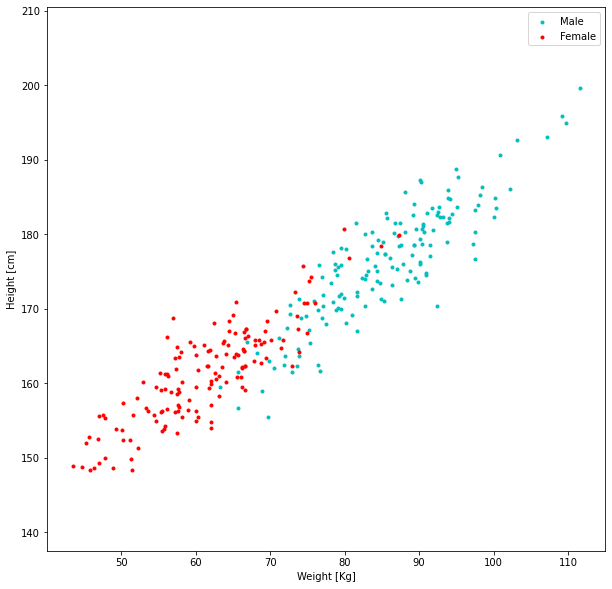

In [ ]:
h, w, g = data_train['Height'], data_train['Weight'], data_train['Gender']

plt.figure(figsize=(10,10))
plt.scatter(w[g=='Male'], h[g=='Male'], marker='.', c='c')
plt.scatter(w[g=='Female'], h[g=='Female'], marker='.', c='r')
plt.axis('equal')
plt.ylabel('Height [cm]')
plt.xlabel('Weight [Kg]')
plt.legend(['Male', 'Female'])


##Data and labels

In [ ]:
X_train = np.stack((w, h), 1)
y_train = np.array(g)

In [ ]:
X_val = np.stack((data_val['Weight'], data_val['Height']), 1)
y_val = np.array(data_val['Gender'])

In [ ]:
print('Training data shape:', X_train.shape)
print('Training labels shape:', y_train.shape)

Training data shape: (300, 2)
Training labels shape: (300,)


In [ ]:
X_train[:2]

array([[ 66.72107336, 167.32255246],
       [ 90.12653941, 176.23703878]])

In [ ]:
y_train[:2] == 'Female'

array([ True, False])

#LVQ classifier

In [ ]:
def Euclidean_distance(sample):
  dist_xy = (Neurons - sample)**2
  dist = dist_xy.sum(axis=1)
  index = np.argmin(dist)
  return index

def inference_batch(Samples, verbose=False):
  dist_xy = (np.expand_dims(Neurons, 0) - np.expand_dims(Samples, 1))**2
  dist = dist_xy.sum(axis=2)
  indexes = np.argmin(dist, axis=1)
  return indexes

In [ ]:
get_winner = Euclidean_distance

##Decision boundary

In [ ]:
x0_min, x0_max = 0, 200
x1_min, x1_max = 0, 200
h = .5  # step size in the mesh
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

In [ ]:
def plot_decision_boundaries(Samples=X_train, sample_classes=y_train, print_full_history=False):
  indexes = inference_batch(np.stack((xx0.ravel(), xx1.ravel()), 1))
  yy = neuron_classes[indexes] == 'Female'

  plt.figure(figsize=(10,10))
  yy = yy.reshape(xx0.shape)
  plt.contourf(xx0, xx1, yy, alpha=0.8)

  plt.scatter(Samples[sample_classes=='Male', 0],   Samples[sample_classes=='Male', 1],   marker='.', c='c')
  plt.scatter(Samples[sample_classes=='Female', 0], Samples[sample_classes=='Female', 1], marker='.', c='r')

  if print_full_history:
    for i, Neurons_i in enumerate(neuron_history):
      for n, neuron_i in enumerate(Neurons_i):
        plt.scatter(neuron_i[0], neuron_i[1], marker='x', s=200,
                    c='k' if neuron_classes[n]=='Male' else 'm',
                    alpha=(i+1)/len(neuron_history))
        plt.text(neuron_i[0], neuron_i[1]+5, str(i))
  else:
    plt.scatter(Neurons[neuron_classes=='Male', 0],   Neurons[neuron_classes=='Male', 1],   marker='d', c='k', s=200)
    plt.scatter(Neurons[neuron_classes=='Female', 0], Neurons[neuron_classes=='Female', 1], marker='d', c='g', s=200)

  plt.axis('equal')
  plt.ylabel('Height [cm]')
  plt.xlabel('Weight [Kg]')

#Model validation

In [ ]:
def compute_accuracy(Samples, sample_classes):
  indexes = inference_batch(Samples, sample_classes)
  predicted_classes = neuron_classes[indexes]
  correct_decisions = predicted_classes == sample_classes
  accuracy = correct_decisions.mean() * 100.
  return accuracy

In [ ]:
def print_status(print_full_history=False):
  print('Neurons:', Neurons)
  print('Validation accuracy:', compute_accuracy(X_val, y_val))
  plot_decision_boundaries(print_full_history=print_full_history)

#Training

##Initialization

***LVQ initialized***
Neurons: [[ 50.  50.]
 [200. 200.]]
Validation accuracy: 82.5


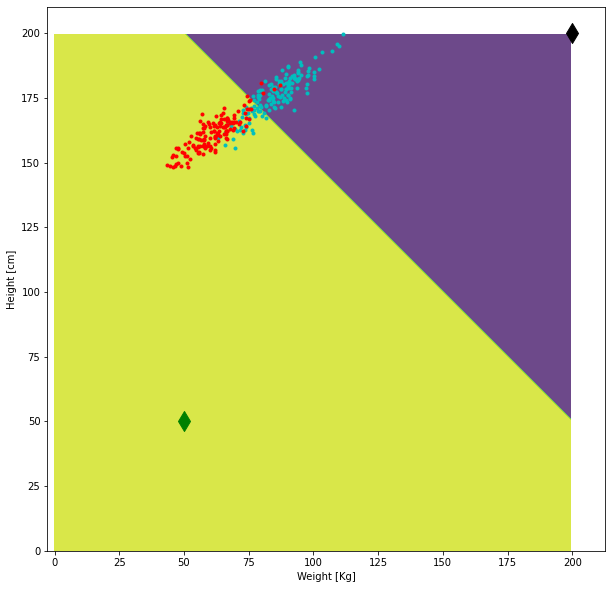

In [ ]:
base_learning_rate = 0.5
epoch = 0

Neurons = np.array([
                    [ 50,  50], # first neuron (f0, f1) coords
                    [200, 200], # second neuron (f0, f1) coords
                    ], dtype=np.float32)
neuron_classes = np.array([
                           'Female',  # class of the first neuron
                           'Male',    # class of the second neuron
                           ])

neuron_history = [Neurons.copy()]

def train_iteration(sample, sample_class, verbose=False):
  learning_rate = base_learning_rate
  #learning_rate *= (1.0-(epoch/float(epochs)))

  i = get_winner(sample)
  winner = Neurons[i]
  winner_class = neuron_classes[i]

  delta = learning_rate * (sample - winner)

  if verbose:
    print('Winner neuron', winner, 'of class', winner_class)

  if sample_class == winner_class:
    Neurons[i] += delta
  else:
    Neurons[i] -= delta
  neuron_history.append(Neurons.copy())

print('***LVQ initialized***')
print_status()

## One step

In [ ]:
index = 0

Training sample n. 1 
- coords: [ 90.12653941 176.23703878] 
- class: Male 

Winner neuron [ 58.36054 108.66128] of class Female
Neurons: [[ 42.47754  74.8734 ]
 [200.      200.     ]]
Validation accuracy: 67.0


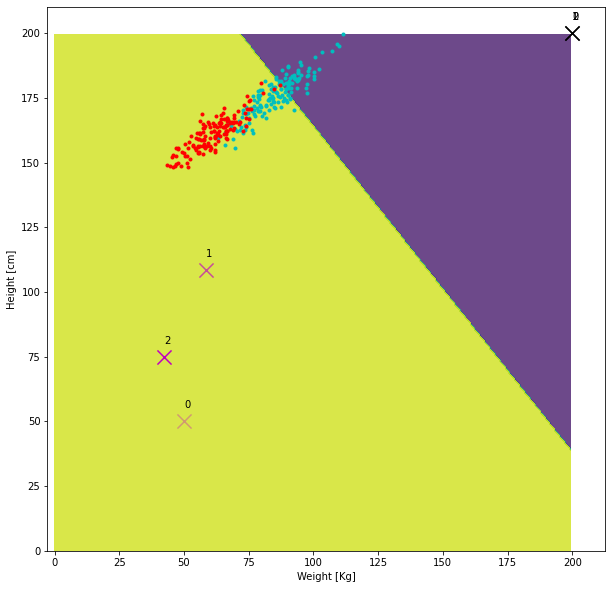

In [ ]:
print('Training sample n.', index, '\n- coords:', X_train[index], '\n- class:', y_train[index], '\n')
train_iteration(X_train[index], y_train[index], verbose=True)

print_status(print_full_history=True)

index = (index + 1) % len(X_train)

## One epoch

### Shuffling

In [ ]:
np.random.seed(0)
indexes = np.random.randint(0, len(X_train), len(X_train))
index = 0

### Main loop

Neurons: [[ 52.771584 155.34077 ]
 [ 89.52816  177.71399 ]]
Validation accuracy: 86.5


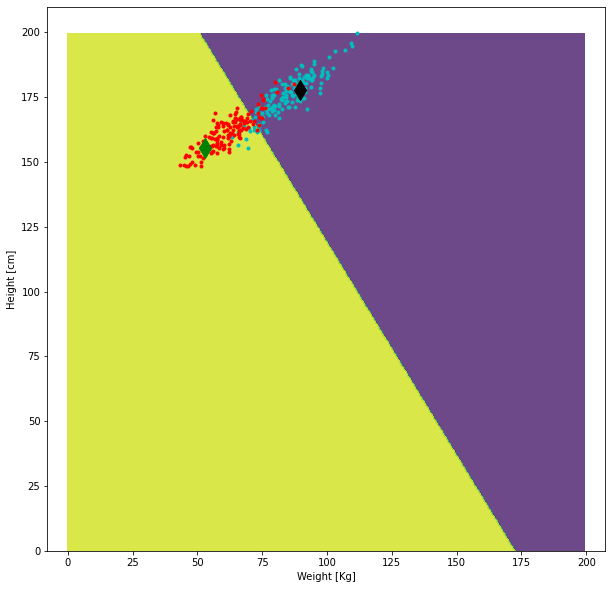

In [ ]:
for index in range(len(X_train)):
  train_iteration(X_train[indexes[index]], y_train[indexes[index]])
epoch += 1
print_status()

## Final configuration

##Test set accuracy

In [ ]:
data_test = pd.read_excel('test.xlsx')

print('Test set samples:', len(data_test))
X_test = np.stack((data_test['Weight'], data_test['Height']), 1)
y_test = np.array(data_test['Gender'])

print('Test set accuracy:', compute_accuracy(X_test, y_test))

Test set samples: 300
Test set accuracy: 90.66666666666666
